In [1]:
import pandas as pd

C:\Users\user\AppData\Local\Temp\ipykernel_20340\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
links = pd.read_csv(r'C:\Users\user\Jupyter Files\Recommender System\ml-dataset-small\ml-latest-small\links.csv')
movies = pd.read_csv(r'C:\Users\user\Jupyter Files\Recommender System\ml-dataset-small\ml-latest-small\movies.csv')
ratings = pd.read_csv(r'C:\Users\user\Jupyter Files\Recommender System\ml-dataset-small\ml-latest-small\ratings.csv')
tags = pd.read_csv(r'C:\Users\user\Jupyter Files\Recommender System\ml-dataset-small\ml-latest-small\tags.csv')

In [3]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [6]:
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

In [7]:
movies

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [8]:
unique_moviesID = set(ratings['movieId'])
unique_userID = set(ratings['userId'])

# Popularity based recommendation

In [9]:
test = ratings[['movieId','rating']]
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
for i,j in test.itertuples(index=False):
    print(i,j)

In [ ]:
avg_ratings_movie = {}

for i,j in test.itertuples(index=False):
    if i not in avg_ratings_movie:
        avg_ratings_movie[i] = [j,1]
    else:
        avg_ratings_movie[i][0] += j
        avg_ratings_movie[i][1] += 1
avg_ratings_movie

In [ ]:
for i in avg_ratings_movie:
    avg_ratings_movie[i][0] = ( avg_ratings_movie[i][0]/avg_ratings_movie[i][1] )
avg_ratings_movie

# Cosine Similarity 

In [13]:
temp = ratings.merge(movies,on='movieId')

In [14]:
temp

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.0,964981247,Grumpier Old Men (1995),"[Comedy, Romance]"
2,1,6,4.0,964982224,Heat (1995),"[Action, Crime, Thriller]"
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]"
4,1,50,5.0,964982931,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),"[Drama, Horror, Thriller]"
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),"[Action, Crime, Thriller]"
100833,610,168250,5.0,1494273047,Get Out (2017),[Horror]
100834,610,168252,5.0,1493846352,Logan (2017),"[Action, Sci-Fi]"


In [15]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [19]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])

In [20]:
movies['genres'] = movies['genres'].apply(lambda x:[i.lower() for i in x])

In [21]:
movies['tags'] = movies['genres']

In [23]:
new_df = movies[['movieId','title','tags']]

In [24]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\user\AppData\Local\Temp\ipykernel_20340\3089450492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


In [25]:
new_df

,movieId,title,tags
0,1,Toy Story (1995),adventure animation children comedy fantasy
1,2,Jumanji (1995),adventure children fantasy
2,3,Grumpier Old Men (1995),comedy romance
3,4,Waiting to Exhale (1995),comedy drama romance
4,5,Father of the Bride Part II (1995),comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),action animation comedy fantasy
9738,193583,No Game No Life: Zero (2017),animation comedy fantasy
9739,193585,Flint (2017),drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),action animation


In [26]:
import nltk

In [28]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [29]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [30]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\user\AppData\Local\Temp\ipykernel_20340\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=6000,stop_words='english')

In [80]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [81]:
vectors[0]

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [82]:
vectors.shape

(9742, 22)

In [83]:
cv.get_feature_names_out()

array(['action', 'adventur', 'anim', 'children', 'comedi', 'crime',
       'documentari', 'drama', 'fantasi', 'fi', 'film', 'horror', 'imax',
       'music', 'mysteri', 'nogenreslisted', 'noir', 'romanc', 'sci',
       'thriller', 'war', 'western'], dtype=object)

In [84]:
from sklearn.metrics.pairwise import cosine_similarity

In [85]:
similarity = cosine_similarity(vectors)

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])

In [286]:
def recommend_BoW(movie):
    s = set()
    movies= movie.split()
    
    for i in range(len(movie)):
        if i == len(movies):
            break
        
    movie = " ".join(movies)
    
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:101]
    for i in movies_list:
        s.add(new_df.iloc[i[0]].title)
    return s

In [287]:
BoW = recommend_BoW('Toy Story (1995)')

# Deep learning using softmax dnn

In [89]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras import initializers
from pprint import pprint

In [2]:
from tensorflow.keras.utils import plot_model

In [91]:
#overall_stats = pd.read_csv(r'C:\Users\user\Jupyter Files\Recommender System\ml-100k\u.info', header=None)
#print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))

In [123]:
#column_names1 = ['user id','movie id','rating','timestamp']
#ratings_dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
#ratings_dataset.head() 

In [122]:
#d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
#column_names2 = d.split(' | ')
#print(column_names2)

In [92]:
#items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
#items_dataset.head()
temp.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.0,964981247,Grumpier Old Men (1995),"[Comedy, Romance]"
2,1,6,4.0,964982224,Heat (1995),"[Action, Crime, Thriller]"
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]"
4,1,50,5.0,964982931,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"


In [94]:
movie_dataset = temp[['movieId','title']]
movie_dataset.head()

,movieId,title
0,1,Toy Story (1995)
1,3,Grumpier Old Men (1995)
2,6,Heat (1995)
3,47,Seven (a.k.a. Se7en) (1995)
4,50,"Usual Suspects, The (1995)"


In [204]:
movie_dataset[movie_dataset['movieId'] == 145].drop_duplicates()['title'].values[0]

'Bad Boys (1995)'

In [212]:
l = set()
l_test = [1,2,10,145,153,260,1196,1210,2628,5378,33493,61160,79006,122886,135216,166528,179819,187595,592,1377,1562,3213,26152,27155,27311,27156,68945,56801,79057,3527,3697,8810,1954,2409,2410,2411,2412,79695,91485,112897,112556,112852,112623]
print(len(l_test))
for i in movie_dataset['movieId']:
    if i in [1,2,10,145,153,260,1196,1210,2628,5378,33493,61160,79006,122886,135216,166528,179819,187595,592,1377,1562,3213,26152,27155,27311,27156,68945,56801,79057,3527,3697,8810,1954,2409,2410,2411,2412,79695,91485,112897,112556,112852,112623]:
        l.add(movie_dataset[movie_dataset['movieId'] == i].drop_duplicates()['title'].values[0])
    #if i in [300,302,313,318,343,405,423,510,552,576]:
        #l_test.append(movie_dataset[movie_dataset['movie id'] == i]['movie title'])'''
l = list(l)

43


In [209]:
#d = []
#for i in range(l):
    #l[i] = str(l[i])[5:].replace('\nName: movie title, dtype: object','').strip(' ')
#df = pd.DataFrame({'col':l})
#df['col'].apply(type)

In [210]:
#for i in range(len(l_test)):
    #l_test[i] = str(l_test[i])[5:].replace('\nName: movie title, dtype: object','').strip(' ')
#l_test

In [213]:
for i in l:
    print(i)

Star Wars: Episode VII - The Force Awakens (2015)
AVP: Alien vs. Predator (2004)
Star Wars: The Clone Wars (2008)
Neon Genesis Evangelion: The End of Evangelion (Shin seiki Evangelion Gekijô-ban: Air/Magokoro wo, kimi ni) (1997)
The Expendables 3 (2014)
Batman/Superman Movie, The (1998)
Empire of Dreams: The Story of the 'Star Wars' Trilogy (2004)
AVPR: Aliens vs. Predator - Requiem (2007)
Batman: Mask of the Phantasm (1993)
Predator (1987)
Toy Story (1995)
Batman (1989)
Predator 2 (1990)
Star Wars: Episode I - The Phantom Menace (1999)
Star Wars: Episode II - Attack of the Clones (2002)
GoldenEye (1995)
Rocky V (1990)
Batman Forever (1995)
Guardians of the Galaxy (2014)
Gone Girl (2014)
Rocky III (1982)
The Star Wars Holiday Special (1978)
Predators (2010)
Batman Returns (1992)
Star Wars: Episode IV - A New Hope (1977)
Batman & Robin (1997)
Solo: A Star Wars Story (2018)
Rocky IV (1985)
Neon Genesis Evangelion: Death & Rebirth (Shin seiki Evangelion Gekijô-ban: Shito shinsei) (1997)
S

In [96]:
#len(temp.groupby(by=column_names2[1:])),len(temp)

In [98]:
#merged_dataset = pd.merge(ratings_dataset, movie_dataset, how='inner', on='movie id')
#merged_dataset.head()

In [97]:
#merged_dataset[(merged_dataset['movie title'] == 'Chasing Amy (1997)') & (merged_dataset['user id'] == 894)]

In [103]:
temp.shape

(100836, 6)

In [104]:
refined_dataset = temp.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean"})
refined_dataset.head()

,userId,title,rating
0,1,"13th Warrior, The (1999)",4.0
1,1,20 Dates (1998),4.0
2,1,"Abyss, The (1989)",4.0
3,1,"Adventures of Robin Hood, The (1938)",5.0
4,1,Alice in Wonderland (1951),5.0


In [106]:
user_enc = LabelEncoder()
refined_dataset['user'] = user_enc.fit_transform(refined_dataset['userId'].values)
n_users = refined_dataset['user'].nunique()

In [107]:
item_enc = LabelEncoder()
refined_dataset['movie'] = item_enc.fit_transform(refined_dataset['title'].values)
n_movies = refined_dataset['movie'].nunique()

In [108]:
refined_dataset['rating'] = refined_dataset['rating'].values.astype(np.float32)
min_rating = min(refined_dataset['rating'])
max_rating = max(refined_dataset['rating'])
n_users, n_movies, min_rating, max_rating

(610, 9719, 0.5, 5.0)

In [109]:
refined_dataset.head()

,userId,title,rating,user,movie
0,1,"13th Warrior, The (1999)",4.0,0,48
1,1,20 Dates (1998),4.0,0,66
2,1,"Abyss, The (1989)",4.0,0,202
3,1,"Adventures of Robin Hood, The (1938)",5.0,0,245
4,1,Alice in Wonderland (1951),5.0,0,325


In [21]:
#refined_dataset[refined_dataset['movie title'] == 'Toy Story (1995)']['movie'].unique()[0]

In [219]:
seen = []
for i in l:
    seen.append(refined_dataset[refined_dataset['title'] == i]['movie'].unique()[0])
seen

[8004,
 181,
 8005,
 6044,
 8465,
 843,
 2727,
 182,
 846,
 6761,
 8871,
 836,
 6762,
 7998,
 7999,
 3529,
 7219,
 839,
 3667,
 3536,
 7217,
 8613,
 6763,
 840,
 8001,
 834,
 7822,
 7218,
 6043,
 8000,
 2852,
 8006,
 753,
 7223,
 2199,
 2853,
 7213,
 4645,
 838,
 835,
 7216,
 8002,
 8003]

In [110]:
X = refined_dataset[['user', 'movie']].values
y = refined_dataset['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90748, 2), (10084, 2), (90748,), (10084,))

In [111]:
print(X_train)

[[ 476 2766]
 [ 155 4464]
 [ 306 8391]
 ...
 [ 312 5139]
 [ 154  591]
 [  88 8559]]


In [7]:
n_factors = 600

In [8]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

NameError: name 'X_train' is not defined

In [114]:
X_train, X_train_array, X_train_array[0].shape

(array([[ 476, 2766],
        [ 155, 4464],
        [ 306, 8391],
        ...,
        [ 312, 5139],
        [ 154,  591],
        [  88, 8559]], dtype=int64),
 [array([476, 155, 306, ..., 312, 154,  88], dtype=int64),
  array([2766, 4464, 8391, ..., 5139,  591, 8559], dtype=int64)],
 (90748,))

In [115]:
y_train = (y_train - min_rating)/(max_rating - min_rating)
y_test = (y_test - min_rating)/(max_rating - min_rating)

In [116]:
## Initializing a input layer for users
user = tf.keras.layers.Input(shape = (1,))

## Embedding layer for n_factors of users
u = keras.layers.Embedding(n_users, n_factors, embeddings_initializer = 'he_normal', embeddings_regularizer = tf.keras.regularizers.l2(1e-6))(user)
u = tf.keras.layers.Reshape((n_factors,))(u)

## Initializing a input layer for movies
movie = tf.keras.layers.Input(shape = (1,))

## Embedding layer for n_factors of movies
m = keras.layers.Embedding(n_movies, n_factors, embeddings_initializer = 'he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
m = tf.keras.layers.Reshape((n_factors,))(m)

## stacking up both user and movie embeddings
x = tf.keras.layers.Concatenate()([u,m])
x = tf.keras.layers.Dropout(0.05)(x)

## Adding a Dense layer to the architecture
x = tf.keras.layers.Dense(32, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(16, kernel_initializer='he_normal')(x)
x = tf.keras.layers.Activation(activation='relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

## Adding an Output layer with Sigmoid activation funtion which gives output between 0 and 1
x = tf.keras.layers.Dense(9)(x)
x = tf.keras.layers.Activation(activation='softmax')(x)

## Adding a Lambda layer to convert the output to rating by scaling it with the help of available rating information
# x = tf.keras.layers.Lambda(lambda x: x*(max_rating - min_rating) + min_rating)(x)

## Defining the model
model = tf.keras.models.Model(inputs=[user,movie], outputs=x)
# optimizer = tf.keras.optimizers.Adam(lr=0.001)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.005,
    # rho=0.9, momentum=0.01, epsilon=1e-07)

## Compiling the model
# model.compile(loss='binary_crossentropy', optimizer = optimizer)
# model.compile(loss='mean_squared_error', optimizer = optimizer,metrics=['accuracy'])
model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [2]:
model = tf.keras.models.load_model(r'C:\Users\user\Jupyter Files\Recommender System\Saves\deep_learning_recsys_v4.h5')
model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 600)               366000    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 600)               5831400   ['input_2[0][0]']             
                                                                                              

In [ ]:
keras.utils.set_random_seed(42)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=3, min_lr=0.000001, verbose=1)

history = model.fit(x = X_train_array, y = y_train, batch_size=128, epochs=70, verbose=1, validation_data=(X_test_array, y_test)
,shuffle=True,callbacks=[reduce_lr])

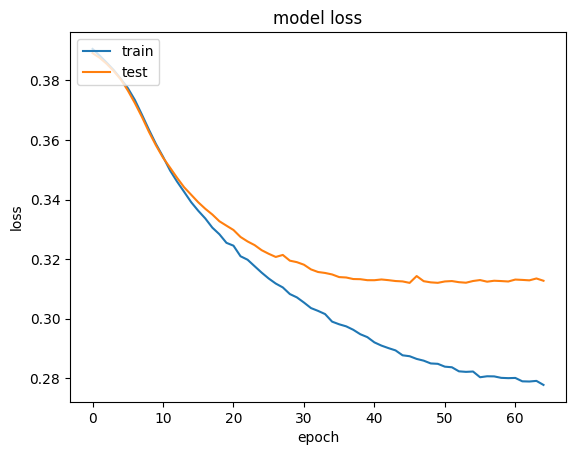

In [119]:
plt.plot(history.history["loss"][5:])
plt.plot(history.history["val_loss"][5:])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [120]:
refined_dataset.head()

,userId,title,rating,user,movie
0,1,"13th Warrior, The (1999)",4.0,0,48
1,1,20 Dates (1998),4.0,0,66
2,1,"Abyss, The (1989)",4.0,0,202
3,1,"Adventures of Robin Hood, The (1938)",5.0,0,245
4,1,Alice in Wonderland (1951),5.0,0,325


In [121]:
X_train_array

[array([476, 155, 306, ..., 312, 154,  88], dtype=int64),
 array([2766, 4464, 8391, ..., 5139,  591, 8559], dtype=int64)]

In [253]:
user_id = [1]
encoded_user_id = user_enc.transform(user_id)

seen_movies = list(refined_dataset[refined_dataset['userId'] == user_id[0]]['movie'])
#seen_movies = seen
print(seen_movies)

[48, 66, 202, 245, 325, 327, 346, 405, 420, 440, 563, 674, 744, 746, 787, 827, 836, 840, 917, 925, 946, 983, 1025, 1048, 1062, 1085, 1110, 1158, 1204, 1227, 1284, 1337, 1535, 1687, 1789, 1828, 1829, 1839, 1924, 1925, 2047, 2139, 2221, 2348, 2388, 2411, 2464, 2528, 2534, 2608, 2619, 2622, 2638, 2657, 2663, 2681, 2734, 2747, 2789, 2836, 2885, 2922, 2940, 3000, 3011, 3092, 3158, 3184, 3252, 3258, 3279, 3281, 3328, 3417, 3418, 3428, 3474, 3489, 3530, 3548, 3564, 3570, 3616, 3634, 3655, 3656, 3661, 3662, 3678, 3845, 3890, 3938, 4010, 4017, 4106, 4176, 4200, 4337, 4344, 4345, 4438, 4488, 4516, 4653, 4654, 4662, 4766, 4808, 4854, 4867, 4882, 4958, 4992, 5029, 5149, 5157, 5163, 5186, 5203, 5306, 5324, 5423, 5488, 5512, 5535, 5582, 5604, 5711, 5780, 5782, 5856, 5862, 5882, 6035, 6057, 6073, 6181, 6255, 6580, 6627, 6632, 6667, 6670, 6761, 6808, 6856, 6857, 6865, 6920, 6944, 7019, 7078, 7079, 7100, 7172, 7173, 7180, 7182, 7190, 7205, 7211, 7213, 7215, 7233, 7292, 7311, 7314, 7322, 7391, 7421, 744

In [254]:
len(refined_dataset['movie'].unique()), min(refined_dataset['movie']), max(refined_dataset['movie'])

(9719, 0, 9718)

In [ ]:
unseen_movies = [i for i in range(min(refined_dataset['movie']), max(refined_dataset['movie'])+1) if i not in seen_movies]
print(unseen_movies)

In [256]:
len(unseen_movies) + len(seen_movies)

9719

In [257]:
model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]
len(model_input), len(model_input[0])

(2, 9487)

In [258]:
predicted_ratings = model.predict(model_input)

297/297 [==============================] - 1s 2ms/step


In [259]:
print(predicted_ratings.shape)


(9487, 9)


In [260]:
print(predicted_ratings)

[[5.7029825e-01 4.2953929e-01 3.0043917e-05 ... 1.6366717e-05
  2.6589150e-05 3.1833395e-05]
 [5.9664738e-01 4.0317550e-01 3.3206143e-05 ... 1.7720147e-05
  2.9397474e-05 3.3857170e-05]
 [4.9828300e-01 5.0151050e-01 3.8845938e-05 ... 2.0518510e-05
  3.6088866e-05 3.9123101e-05]
 ...
 [7.1542311e-01 2.8445110e-01 2.3885546e-05 ... 1.2235219e-05
  1.9788429e-05 2.4855495e-05]
 [6.1007124e-01 3.8977090e-01 2.9239951e-05 ... 1.5879181e-05
  2.5266778e-05 3.0878655e-05]
 [5.1394153e-01 4.8585278e-01 3.8527549e-05 ... 2.0717323e-05
  3.5299472e-05 3.8981438e-05]]


In [261]:
predicted_ratings = np.max(predicted_ratings, axis=1)
predicted_ratings

array([0.57029825, 0.5966474 , 0.5015105 , ..., 0.7154231 , 0.61007124,
       0.5139415 ], dtype=float32)

In [262]:
predicted_ratings.shape

(9487,)

In [263]:
sorted_index = np.argsort(predicted_ratings)[::-1]
print(sorted_index)

[9081 7720 1892 ... 1144 5182 8688]


In [264]:
recommended_movies = item_enc.inverse_transform(sorted_index)
recommended_movies

array(['Union: The Business Behind Getting High, The (2007)',
       'Sister Act 2: Back in the Habit (1993)', 'Colonia (2016)', ...,
       'Blade (1998)', 'Long Live Ghosts! (1977)',
       'This Is England (2006)'], dtype=object)

In [265]:
pprint(list(recommended_movies)[:100])

['Union: The Business Behind Getting High, The (2007)',
 'Sister Act 2: Back in the Habit (1993)',
 'Colonia (2016)',
 'Adanggaman (2000)',
 "Mon oncle d'Amérique (1980)",
 'Risen (2016)',
 'Vanishing, The (Spoorloos) (1988)',
 'Hell in the Pacific (1968)',
 'Bachelor Party (1984)',
 'Clerks (1994)',
 'Sarah Silverman: Jesus Is Magic (2005)',
 'Dear Zachary: A Letter to a Son About His Father (2008)',
 'Bourne Identity, The (2002)',
 'Snowtown (Snowtown Murders, The) (2011)',
 'Maria Bamford: The Special Special Special! (2012)',
 'Accidental Tourist, The (1988)',
 "Jupiter's Wife (1994)",
 'Cemetery Junction (2010)',
 'Power of Nightmares, The: The Rise of the Politics of Fear (2004)',
 'The Night Before (1988)',
 'Faces of Death 3 (1985)',
 'Dogma (1999)',
 'Best Years of Our Lives, The (1946)',
 'Nadja (1994)',
 'House II: The Second Story (1987)',
 'Riddick (2013)',
 'Barfly (1987)',
 'Brokeback Mountain (2005)',
 'Cemetery Man (Dellamorte Dellamore) (1994)',
 'For Your Eyes Only (

In [273]:
model.save(r'C:\Users\user\Jupyter Files\Recommender System\Saves\deep_learning_recsys_v4.h5')

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [274]:
def recommender_system(user_id, model, n_movies):

  print("")
  print("Movie seen by the User:")
  pprint(list(refined_dataset[refined_dataset['userId'] == user_id]['title']))
  pprint(l_test)
  print("")

  encoded_user_id = user_enc.transform([user_id])

  seen_movies = list(refined_dataset[refined_dataset['userId'] == user_id]['movie'])
  #seen_movies = seen
  unseen_movies = [i for i in range(min(refined_dataset['movie']), max(refined_dataset['movie'])+1) if i not in seen_movies]
  model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]
  predicted_ratings = model.predict(model_input)
  predicted_ratings = np.max(predicted_ratings, axis=1)
  sorted_index = np.argsort(predicted_ratings)[::-1]
  recommended_movies = item_enc.inverse_transform(sorted_index)
  print("---------------------------------------------------------------------------------")
  print("Top "+str(n_movies)+" Movie recommendations for the User "+str(user_id)+ " are:")
  #pprint(list(recommended_movies[:n_movies]))
  return list(recommended_movies[:n_movies])

In [308]:
print("Enter user id")
user_id= int(input())

print("Enter number of movies to be recommended:")
n_movies = int(input())
temp = recommender_system(user_id,model,n_movies)

Enter user id


 1


Enter number of movies to be recommended:


 100



Movie seen by the User:
['13th Warrior, The (1999)',
 '20 Dates (1998)',
 'Abyss, The (1989)',
 'Adventures of Robin Hood, The (1938)',
 'Alice in Wonderland (1951)',
 'Alien (1979)',
 'All Quiet on the Western Front (1930)',
 'American Beauty (1999)',
 'American History X (1998)',
 'American Tail, An (1986)',
 'Apocalypse Now (1979)',
 'Austin Powers: International Man of Mystery (1997)',
 'Back to the Future (1985)',
 'Back to the Future Part III (1990)',
 'Bambi (1942)',
 'Basic Instinct (1992)',
 'Batman (1989)',
 'Batman Returns (1992)',
 'Bedknobs and Broomsticks (1971)',
 'Beetlejuice (1988)',
 'Being John Malkovich (1999)',
 'Best Men (1997)',
 'Big (1988)',
 'Big Lebowski, The (1998)',
 'Big Trouble in Little China (1986)',
 'Billy Madison (1995)',
 'Black Cauldron, The (1985)',
 'Blazing Saddles (1974)',
 'Blown Away (1994)',
 'Blues Brothers, The (1980)',
 'Bottle Rocket (1996)',
 'Braveheart (1995)',
 'Canadian Bacon (1995)',
 "Charlotte's Web (1973)",
 'Citizen Kane (1941

In [297]:
seen = set(refined_dataset[refined_dataset['userId'] == 1]['title'])
true_rec = {}
for i in seen:
    for j in recommend_BoW(i):
        if j not in true_rec:
            true_rec[j] = 1
        else:
            true_rec[j] += 1
for i in temp:
    if j not in true_rec:
        true_rec[j] = 1
    else:
        true_rec[j] += 1
true_rec = dict(sorted(true_rec.items(), key=lambda item: item[1],reverse=True))

for i in true_rec:
    print(i,true_rec[i])

Street Fighter (1994) 21
Highlander (1986) 21
Dragonheart (1996) 21
Star Wars: Episode IV - A New Hope (1977) 21
Stargate (1994) 21
Indiana Jones and the Temple of Doom (1984) 20
Conan the Barbarian (1982) 20
Mortal Kombat: Annihilation (1997) 20
Lord of the Rings, The (1978) 20
We're Back! A Dinosaur's Story (1993) 20
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981) 19
Kull the Conqueror (1997) 19
Ghost and the Darkness, The (1996) 19
Tarzan and the Lost City (1998) 19
Phantom, The (1996) 19
Fled (1996) 19
Indiana Jones and the Last Crusade (1989) 19
Avengers, The (1998) 19
Land Before Time, The (1988) 19
Sinbad: Legend of the Seven Seas (2003) 19
Kirikou and the Sorceress (Kirikou et la sorcière) (1998) 19
Atlantis: The Lost Empire (2001) 19
101 Dalmatians (One Hundred and One Dalmatians) (1961) 19
Phantom Tollbooth, The (1970) 19
Cat Returns, The (Neko no ongaeshi) (2002) 19
Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (2002) 19
Balto (1995) 19
Road War